# **#1 in MLP Project – Code, Chaos, and a Bit of Madness**

<p class=mb-5>
This is my first time writing and sharing something like this publicly. But after a wild ride in the Machine Learning Practice (MLP) Project at IIT Madras—where I managed to finish Rank <strong>#1</strong> out of 1700+ students—I felt it was worth putting my work out there.
</p>

![Kaggle Leaderboard](https://raw.githubusercontent.com/Yadav-Aayansh/System-Threat-Forecaster/main/assets/Kaggle_Leaderboard.png)

<p class=mb-5>
In this post, I’m sharing my complete journey—what worked, what bombed, what I learned, and how I tackled the competition from start to finish. If you're into machine learning, Kaggle-style comps, or just here for a good story—you’re in the right place.
</p>

## **Introduction**

<p class="mb-5">
This project was part of the Machine Learning Practice (MLP) course at IIT Madras. It was designed as a full-fledged Kaggle-style competition where over 1700 students participated. The task? Predict whether a system is likely to get infected by malware, using telemetry data collected by antivirus software.
</p>

We were provided with three main files:

<div class="mb-5">
<li> <strong> train.csv </strong> – containing labeled data </li>
<li> <strong> test.csv </strong> – for which predictions were to be made </li>
<li> <strong> sample_submission.csv </strong> – showing the required submission format </li>
</div>

<p class="mb-5"> You can download the Datasets here:
<a href="https://github.com/Yadav-Aayansh/System-Threat-Forecaster" target="_blank"> <strong> GitHub </strong> </a>
</p>

## **Importing Libraries**


I started with the usual suspects — `numpy`, `pandas` and some plotting friends like `matplotlib` and `seaborn`. Obviously, I didn’t import everything at once. Like any true coder, I added more only when the errors started shouting at me.

<p class="mt-2 mb-5">
Eventually, I ended up with a pretty packed import block that looked like I was preparing for war!
</p>





In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', 100)

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


import warnings
warnings.filterwarnings('ignore')



## **Initial Exploration**

### **Loading the Data**



<p class="mb-5"> The first step was simple — load the CSVs. No rocket science here, just the classic <code> pandas.read_csv() </code> and a prayer that the paths were correct on the first try. </p>



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


train.head(5)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0




### **Quick Overview**

<p> After loading, I checked the structure of the dataset — </p>
<ul class="ms-5">
<li class="li-disc"> <strong> 100,000 </strong> rows in the training set  </li>
<li class="li-disc"> <strong> 76 </strong> Columns, including the <code> target </code> </li>
<li class="li-disc"> <strong> 47 </strong> Numerical Features  </li>
<li class="li-disc"> <strong> 28 </strong> Categorical Features </li>
<li class="li-disc"> <strong> 33 </strong> Features with missing values, but each has less than 1% missing, totally manageable! </li>
</ul>

<p class="mt-2 mb-5"> Honestly? Not too messy—more like a college student’s room than a full crime scene. </p>




In [3]:
def initial_exploration(dataset):
    print(f"Shape of Dataset: {dataset.shape}")
    feature_matrix = dataset.drop(columns=['target'])
    label_vector = dataset['target']

    numerical_features = feature_matrix.select_dtypes(include='number').columns
    categorical_features = feature_matrix.select_dtypes(include='object').columns
    print(f"Numerical Features: {len(numerical_features)}")
    print(f"Categorical Features: {len(categorical_features)}")

    nan_features = dataset.columns[dataset.isna().sum() > 0]
    print(f"Features with NaN: {len(nan_features)}")
    return feature_matrix, label_vector, numerical_features, categorical_features

X_train, y_train, numerical_features, categorical_features = initial_exploration(train)


Shape of Dataset: (100000, 76)
Numerical Features: 47
Categorical Features: 28
Features with NaN: 33


In [4]:
def null_values_analyze(dataset):
    custom_df = dataset.isna().sum()
    custom_df = custom_df[custom_df > 0].to_frame(name='NaN Count')
    custom_df['NaN %'] = (custom_df['NaN Count'] / dataset.shape[0]) * 100

    print(custom_df)

null_values_analyze(train)


                                    NaN Count  NaN %
RealTimeProtectionState                    66  0.066
AntivirusConfigID                          76  0.076
NumAntivirusProductsInstalled              76  0.076
NumAntivirusProductsEnabled                76  0.076
CityID                                    623  0.623
IsSystemProtected                          76  0.076
SMode                                     981  0.981
IEVersionID                               107  0.107
FirewallEnabled                           166  0.166
EnableLUA                                  19  0.019
OEMNameID                                 212  0.212
OEMModelID                                228  0.228
ProcessorCoreCount                         85  0.085
ProcessorManufacturerID                    85  0.085
ProcessorModelID                           85  0.085
PrimaryDiskCapacityMB                     110  0.110
PrimaryDiskType                            23  0.023
SystemVolumeCapacityMB                    110 



## **Exploratory Data Analysis**

<p class="mb-5">
Before diving into model building, I needed to understand the battlefield—aka, the dataset. Exploratory Data Analysis (EDA) helped identify patterns, suspicious features, potential data issues, and hidden gold mines. 
</p>

<h3 class="font-semibold"> Numerical Features Overview </h3>

<p class="mb-0">
Time to zoom into the numerical features. Some of them were helpful, some were just there for moral support.
</p>

<ul>
  <li class="mb-4 li-decimal"> 
    <span class="text-xl font-semibold"> Useless Columns: </span>
    <code>IsBetaUser</code>, <code>AutoSampleSubmissionEnabled</code>, and <code>IsFlightsDisabled</code> had only a single unique value. Basically the interns of the dataset.
  </li>

  <li class="mb-4 li-decimal"> 
    <span class="text-xl font-semibold"> Binary Gang: </span>
    Many columns like <code>IsPassiveModeEnabled</code>, <code>IsSystemProtected</code>, <code>SMode</code>, <code>FirewallEnabled</code>, <code>HasOpticalDiskDrive</code>, <code>IsPortableOS</code>, <code>IsSecureBootEnabled</code>, <code>IsVirtualDevice</code>, <code>IsTouchEnabled</code>, <code>IsPenCapable</code>, <code>IsAlwaysOnAlwaysConnectedCapable</code>, and <code>IsGamer</code> were binary—great for modeling, not so great for insight.
  </li>

  <li class="mb-4 li-decimal">
    <span class="text-xl font-semibold"> Genuinely Numeric: </span>
    Features like <code>ProcessorCoreCount</code>, <code>PrimaryDiskCapacityMB</code>, <code>SystemVolumeCapacityMB</code>, <code>TotalPhysicalRAMMB</code>, <code>PrimaryDisplayDiagonalInches</code>, <code>PrimaryDisplayResolutionHorizontal</code>, and <code>PrimaryDisplayResolutionVertical</code> were actual continuous numerical variables. Finally, some real MVPs.
  </li>

  <li class="mb-4 li-decimal">
    <span class="text-xl font-semibold">Important Distribution Patterns :</span>
    <ol class="ms-5">
      <li class="li-square"><code>TotalPhysicalRAMMB</code> is right-skewed — most systems had lower RAM, with fewer high-end machines hogging the upper range.</li>
      <li class="li-square"><code>PrimaryDisplayResolutionHorizontal</code> and <code>PrimaryDisplayResolutionVertical</code> clustered around common resolutions like 1366×768 and 1920×1080 — standard display gang.</li>
      <li class="li-square"><code>CountryID</code> and <code>CityID</code> had broad, fairly uniform distributions, suggesting data came from a wide variety of locations—a nice bonus for generalization.</li>
    </ol>
  </li>

  <li class="li-decimal">
    <span class="text-xl font-semibold">Interesting Correlations :</span>
    <ol class="ms-5">
      <li class="li-square"><code>PrimaryDisplayResolutionHorizontal</code> and <code> PrimaryDisplayResolutionVertical</code> are 0.75 correlated, which is logical since screen dimensions often scale together.</li>
      <li class="li-square"><code>OSUILocaleID </code> and <code>OSInstallLanguageID </code> have 0.99 correlation — twins, basically.</li>
      <li class="li-square"><code>OSBuildNumberOnly </code> and <code>OSBuildRevisionOnly </code> show 0.95 correlation.</li>
      <li class="li-square"><code>TotalPhysicalRAMMB </code> correlates with <code>PrimaryDiskCapacityMB</code>, indicating rich devices are rich in everything.</li>
    </ol>
  </li>
</ul>



In [5]:
X_train[numerical_features].describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,0.0,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,0.0,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000




<h4 class="font-semibold"> Visualizing Outliers with Boxplots </h4>



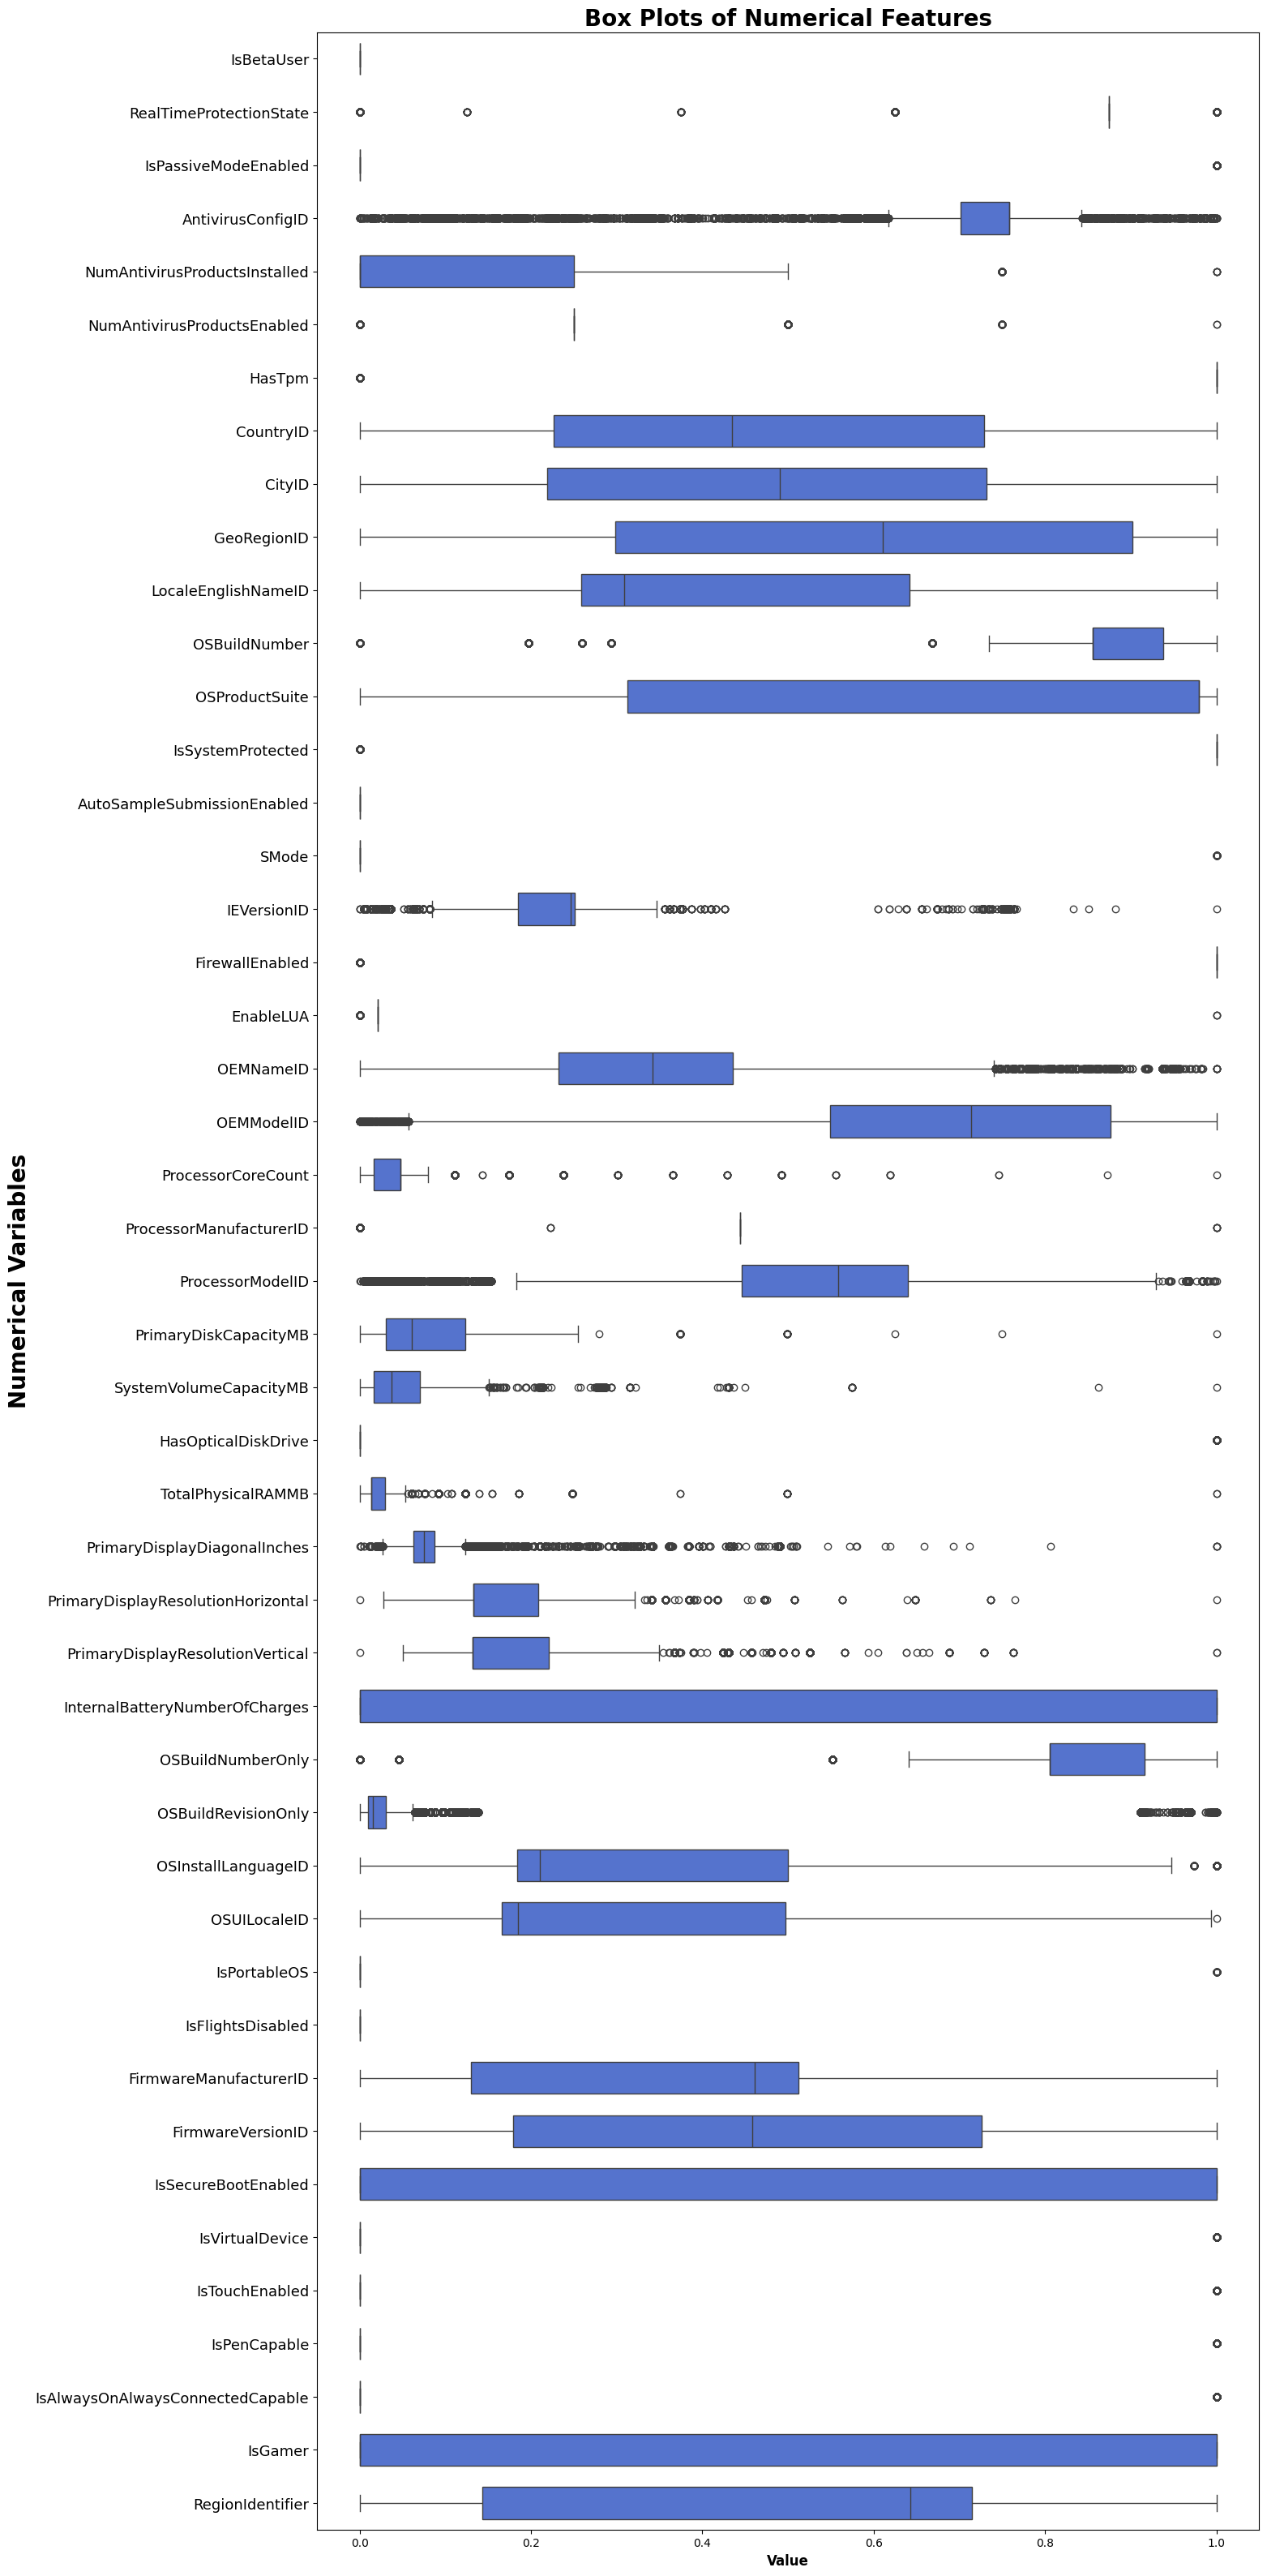

In [6]:
plt.figure(figsize=(15, 40))

sns.boxplot(data=MinMaxScaler().fit_transform(train[numerical_features]), color="royalblue", orient="h", width=0.6)

plt.title("Box Plots of Numerical Features", fontweight="bold", fontsize=20)
plt.xlabel("Value", fontweight="bold", fontsize=12)
plt.ylabel("Numerical Variables", fontweight="bold", fontsize=20)
plt.yticks(ticks=list(range(len(numerical_features))), labels=numerical_features, fontsize=13)

plt.show()




<h4 class="font-semibold"> Distribution of Numerical Features </h4>




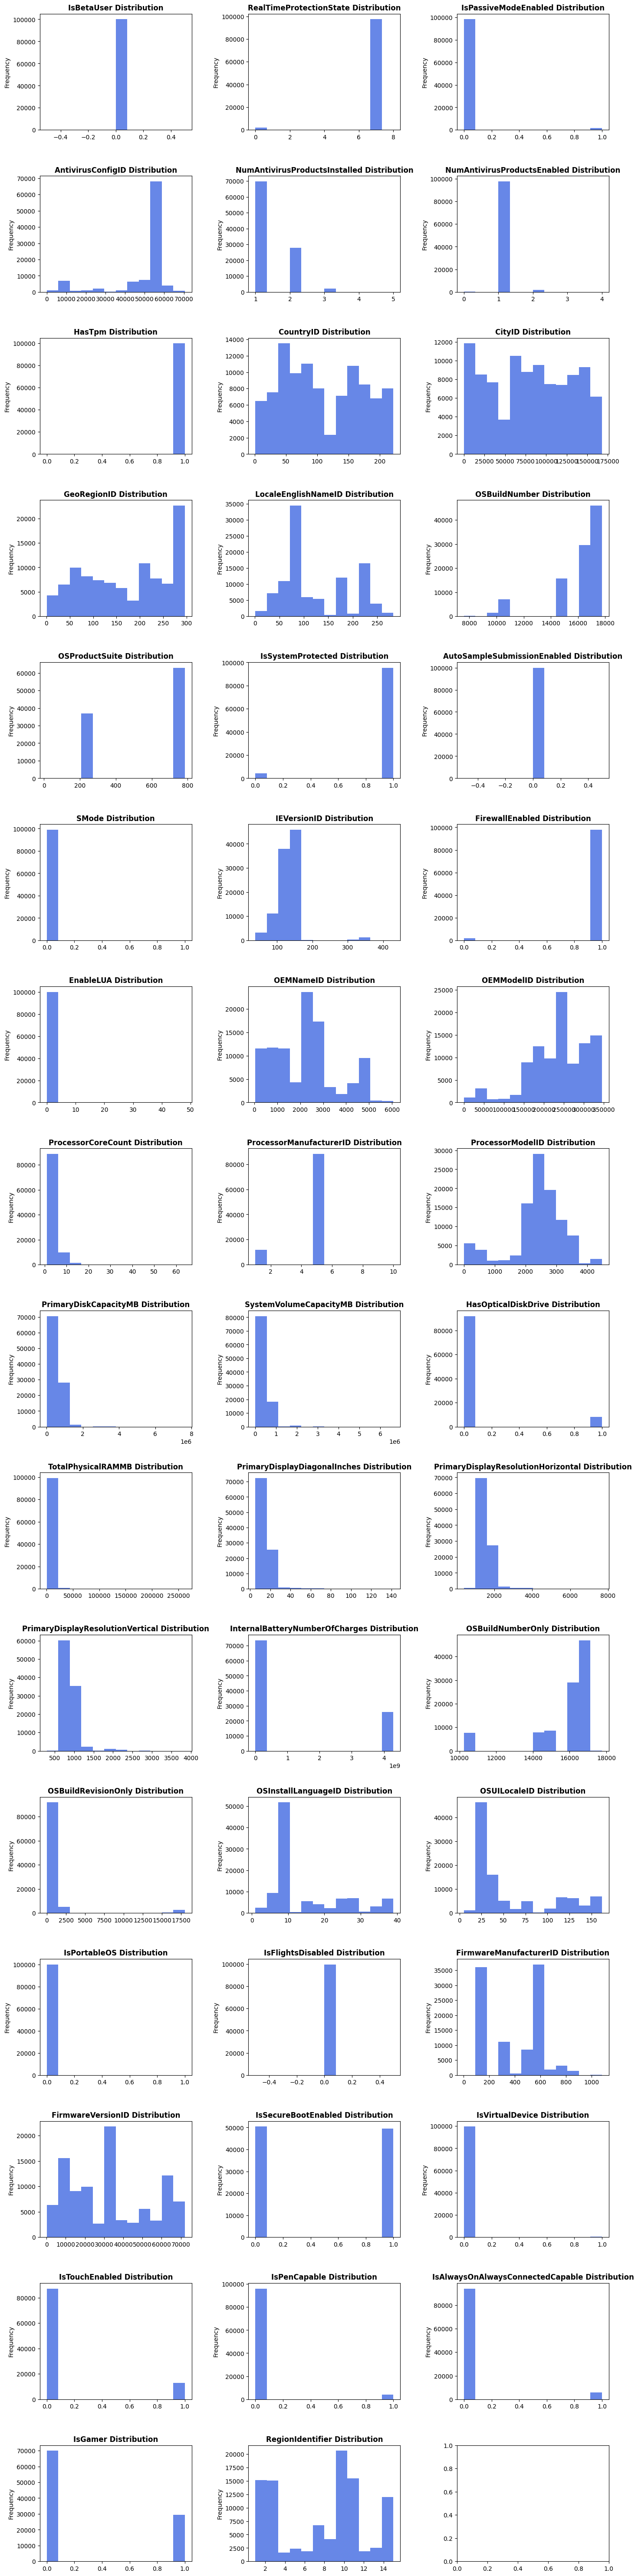

In [7]:
fig, axes = plt.subplots(16,3, figsize=(15,60))
axes = axes.flatten() 

for i, feature in enumerate(numerical_features):
    X_train[feature].plot(kind="hist", ax=axes[i], bins=12, color='royalblue', alpha=0.8)
    axes[i].set_title(f"{feature} Distribution", fontweight="bold")
    axes[i].set_ylabel("Frequency")

fig.tight_layout(pad=3.0)
plt.show()




<h4 class="font-semibold"> Correlation Heatmap for Numerical Features </h4>




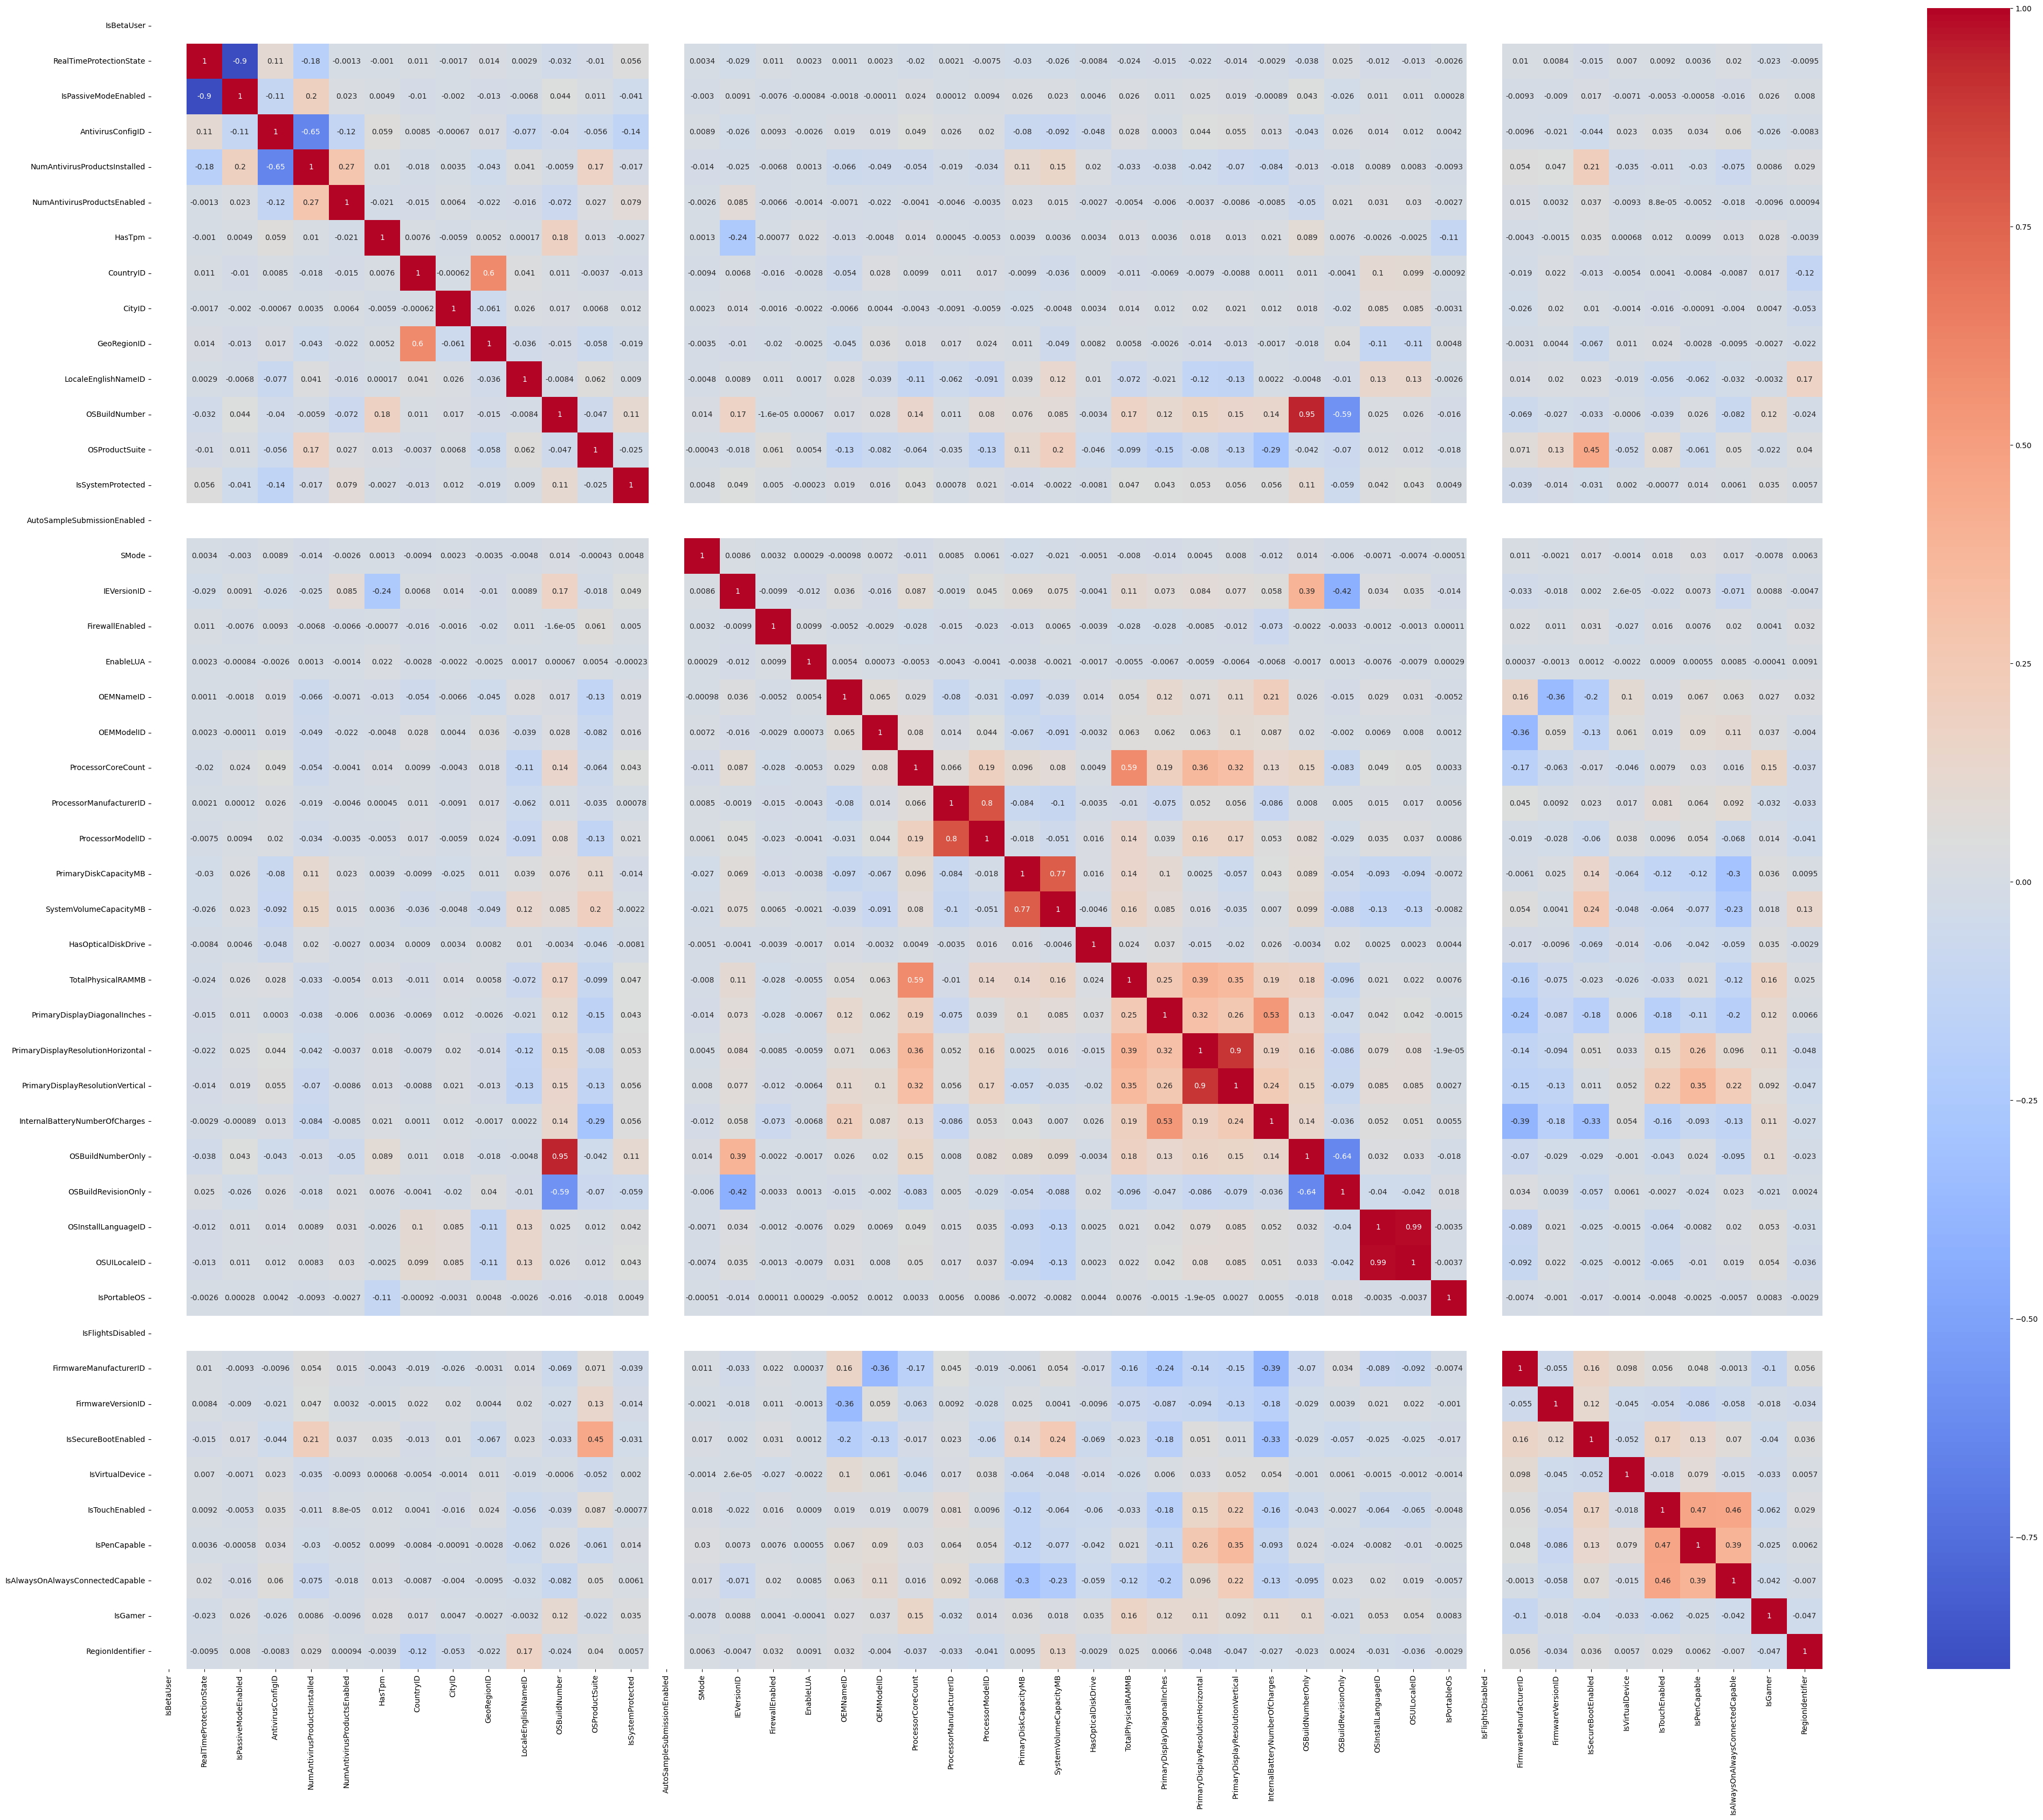

In [8]:
plt.figure(figsize=(50, 40))
sns.heatmap(X_train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()



<h3 class="font-semibold"> Categorical Features Overview </h3>

After taming the numerical features, it was time to dive into the land of categories — the drama queens of any dataset.

<ul>
  <li class="mb-4 li-decimal">
    <span class="text-xl font-semibold">Dominant Classes :</span>
    <ol class="ms-5">
      <li class="li-square"><code>Platform Type: </code> Windows 10 dominates the dataset (>95% of systems), with minimal presence of Windows 7, Windows 8, and Windows 2016.</li>
      <li class="li-square"><code>OS Architecture: </code> AMD64 (64-bit) architecture is the majority (>90%), with minimal x86 (32-bit) and ARM64 systems. </li>
      <li class="li-square"><code>Device Family: </code> Windows Desktop systems make up the vast majority, with very few Windows Server devices.</li>
    </ol>
  </li>

  <li class="li-decimal">
    <span class="text-xl font-semibold">Redundancy Alert :</span>
    <ol class="ms-5">
      <li class="li-square"><code>Product Name</code>, <code> OS Version</code> and <code> Platform Type</code> are tightly coupled — (99%) correlation. If you’ve seen one, you’ve seen them all.</li>
      <li class="li-square"><code>Processor </code> and <code>Architecture </code> have perfect correlation (1.00). Makes sense—you’re not running 64-bit Windows on a potato CPU.</li>
    </ol>
  </li>
</ul>
 

<h4 class="font-semibold"> Distribution of Categorical Features </h4>



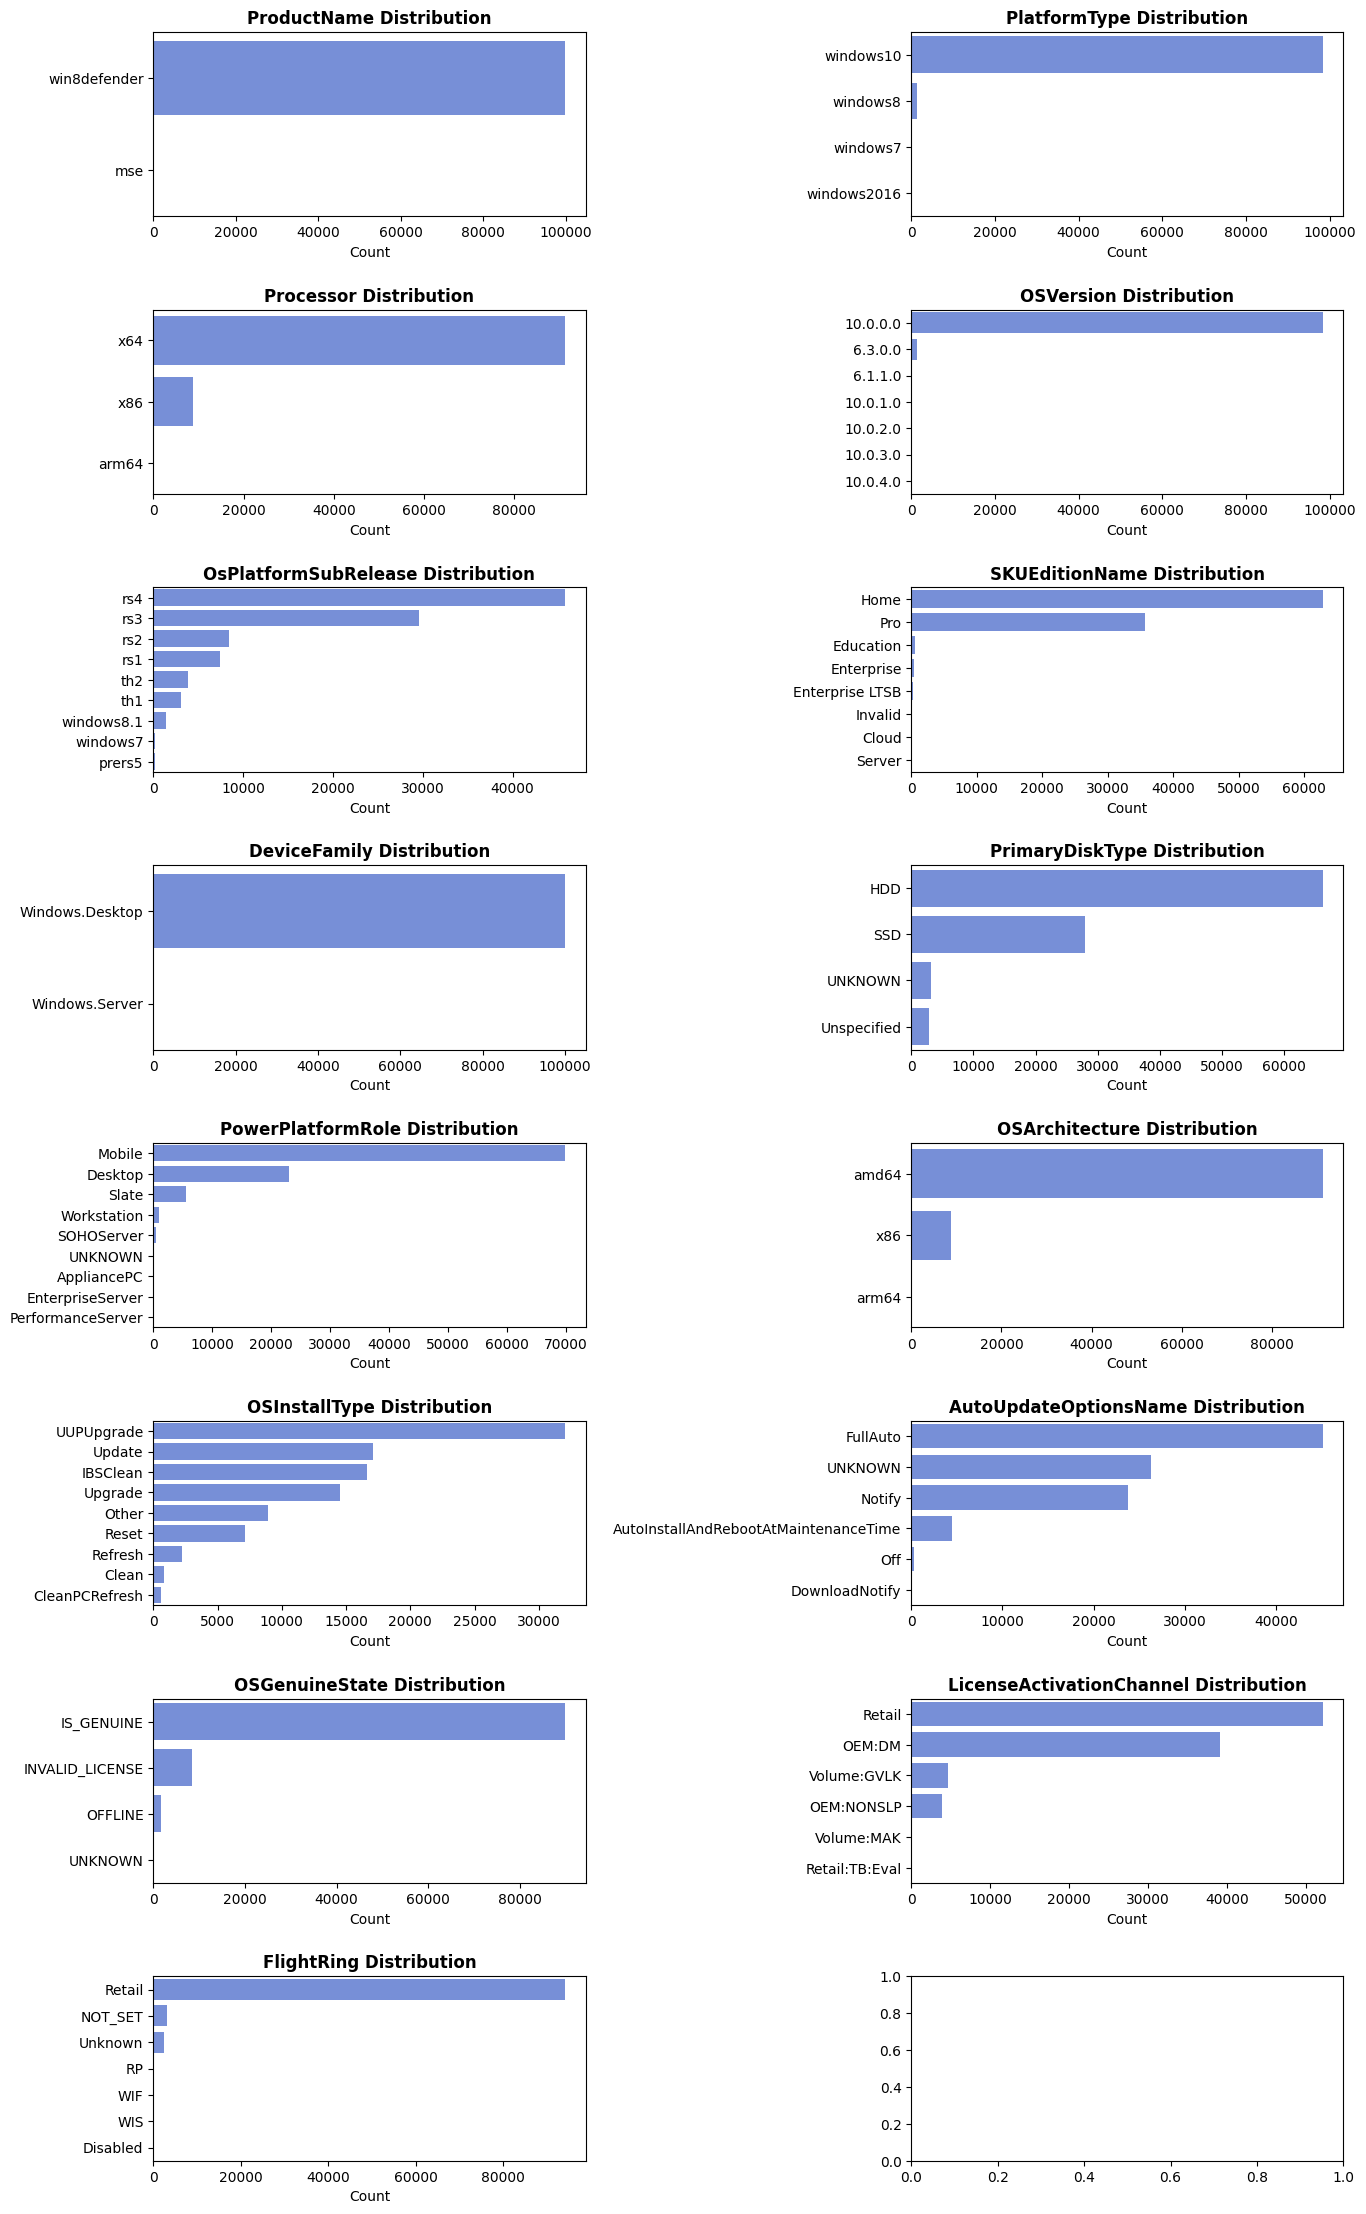

In [9]:
filtered_features = [col for col in categorical_features if X_train[col].nunique() <= 10]

fig, axes = plt.subplots(len(filtered_features) // 2 + 1, 2, figsize=(14, len(filtered_features) * 1.5))
axes = axes.flatten()

for i, feature in enumerate(filtered_features):
    sns.countplot(y=X_train[feature], ax=axes[i], order=X_train[feature].value_counts().index, color="royalblue", alpha=0.8)
    axes[i].set_title(f"{feature} Distribution", fontweight="bold")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

fig.tight_layout(pad=2.0)
plt.show()




<h4 class="font-semibold"> Correlation between Categorical Features (Cramér’s V Style) </h4>




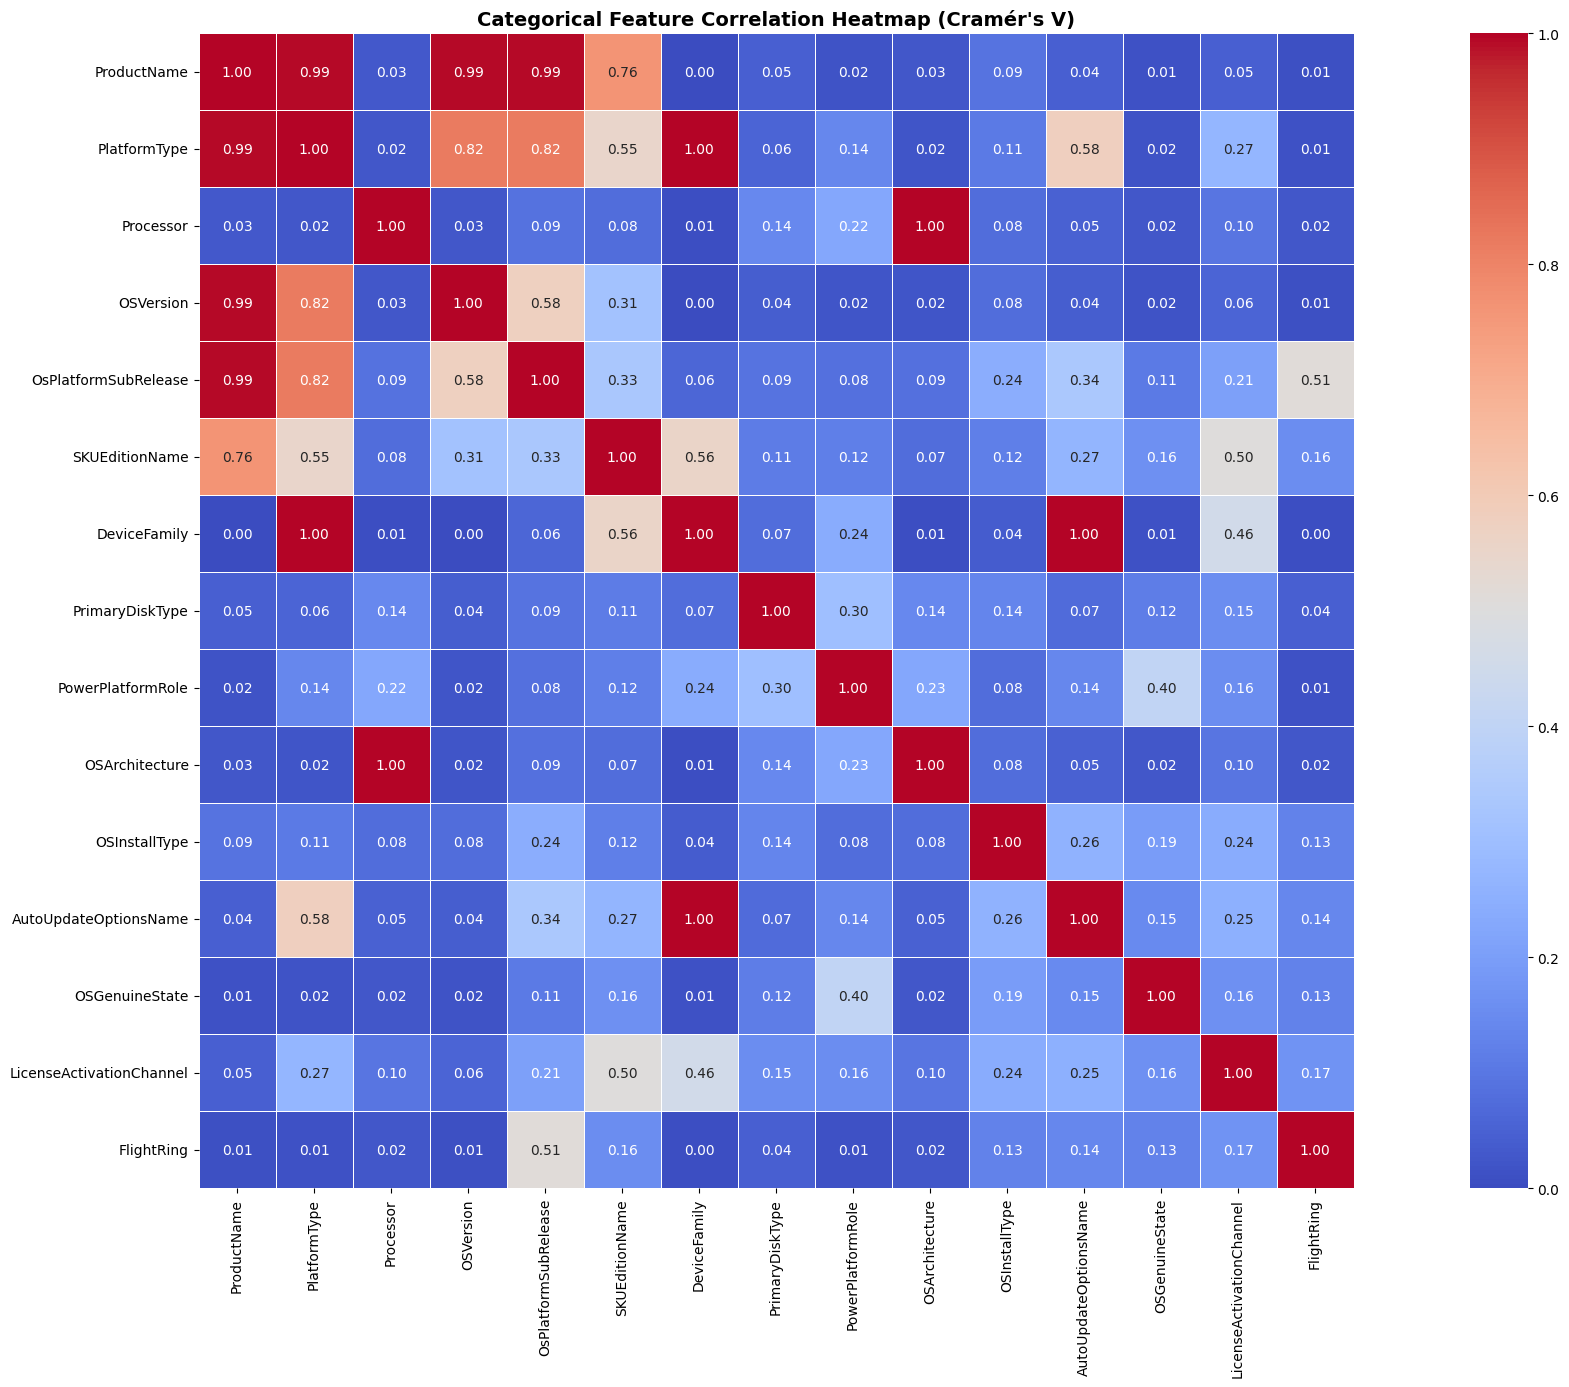

In [10]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

filtered_features = [col for col in categorical_features if X_train[col].nunique() <= 10]

categorical_corr = pd.DataFrame(index=filtered_features, columns=filtered_features, dtype=float)

for i, col1 in enumerate(filtered_features):
    for j, col2 in enumerate(filtered_features):
        if j >= i:
            if col1 == col2:
                categorical_corr.loc[col1, col2] = 1.0
            else:
                categorical_corr.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])
                categorical_corr.loc[col2, col1] = categorical_corr.loc[col1, col2]

plt.figure(figsize=(30, 15))
sns.heatmap(categorical_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Categorical Feature Correlation Heatmap (Cramér's V)", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



<h3 class="font-semibold"> Target Variable Analysis </h3>

Before moving forward with modeling, I needed to verify if the target variable was balanced—or if I was about to walk into an imbalanced data nightmare.

<ul class="ms-5">
<li class="li-disc"> The classes were almost perfectly balanced. Around 51% vs 49%. </li>
<li class="li-disc"> No class dominates, which is a dream scenario in binary classification. </li>
<li class="li-disc"> That means: No need for oversampling, undersampling, synthetic data generation, or praying to the ML gods. </li>
</ul>




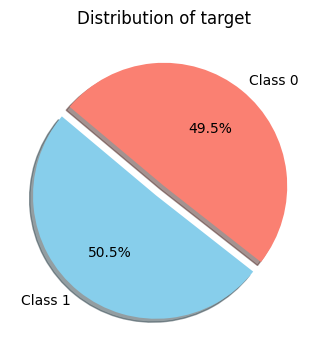

In [11]:
labels = ['Class 1', 'Class 0']
sizes = y_train.value_counts()
colors = ['skyblue', 'salmon']
explode = (0.1, 0) 

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
plt.title('Distribution of target')
plt.show()



## **Data Preprocessing**

<p class="mb-5">
Alright, EDA gave me all the gossip: who’s fake, who’s flaky, and who’s actually useful. Then came the cleanup — like Mom before Diwali. No mercy, just dropping useless columns, engineering new ones, handling nulls, and encoding everything into a machine-learning-friendly format. Total sanskari data now.
</p>

### **Removing Columns**

<ol class="ms-5 mb-5">
  <li class="mb-2 li-disc"> 
    <span class="text-xl font-semibold"> MachineID: </span>
    just a random identifier, not useful for predictions.
  </li>
  <li class="mb-2 li-disc"> 
    <span class="text-xl font-semibold"> IsBetaUser, AutoSampleSubmissionEnabled, IsFlightsDisabled: </span>
    Each had only one unique value. Why even show up?
  </li>
  <li class="mb-2 li-disc"> 
    <span class="text-xl font-semibold"> OSUILocaleID: </span>
    99% correlated with OSInstallLanguageID (BFFs)
  </li>
  <li class="mb-2 li-disc"> 
    <span class="text-xl font-semibold"> OSBuildNumberOnly: </span>
    95% correlated with OSBuildNumber (BFFs)
  </li>
  <li class="mb-2 li-disc"> 
    Dropping additional features that are binary but have a single dominant value, as well as some features that are unlikely to be relevant. 
  </li>
</ol>



In [12]:
drop_cols = ['AutoSampleSubmissionEnabled', 'IsBetaUser', 'IsFlightsDisabled', 
             'OSBuildNumberOnly', 'MachineID', 'ProductName', 'PlatformType', 'DeviceFamily',
             'OSUILocaleID', 'OSProductSuite', 'LocaleEnglishNameID', 'OSBuildRevisionOnly', 
             'OSBuildNumber', 'HasTpm', 'GeoRegionID', 'CountryID']

X_train_dropped = X_train.drop(columns=drop_cols)
test_dropped = test.drop(columns=drop_cols)



### **Feature Engineering**

<ol class="ms-5 mb-5">
  <li class="mb-4 li-disc"> 
    <span class="text-xl font-semibold"> DateAS - DateOS: </span>
    I had two dates: DateAS (Antivirus Date) and DateOS (OS Installation Date). On their own? Boring. But subtract one from the other? Boom — I got something meaningful, <em> How long the antivirus came after the OS was installed? </em> Turns out, Users who updated antivirus after the OS install were more likely to detect malware. Makes sense—defense came late.
  </li>
  <li class="mb-4 li-disc"> 
    <span class="text-xl font-semibold"> AppVersion: </span>
    AppVersion was something like <em> 4.18.2001.10 </em>. Cool for humans, not great for models. I just grabbed the second part (18) to turn it into a clean integer.
  </li>
</ol>

<p class="mb-5">
But hold up, this dataset also had other version like columns: SignatureVersion, NumericOSVersion, OSVersion, EngineVersion! These also looked like version numbers. So naturally, I tried. Trust me, I did. But here’s the twist...
<br><br>
<em>Breaking them down didn’t help the model much. Maybe because the version formats were inconsistent, or because too many micro-versions created noise. So instead of dissecting them, I passed them through an <strong>Ordinal Encoder</strong>! </em>
</p>



In [13]:
# Feature Engineering 1
X_train_dropped['DiffOS'] = pd.to_datetime(X_train_dropped['DateAS']) - pd.to_datetime(X_train_dropped['DateOS'])
X_train_dropped['DiffOS'] = X_train_dropped['DiffOS'].map(lambda x: x.days//7)
test_dropped['DiffOS'] = pd.to_datetime(test_dropped['DateAS']) - pd.to_datetime(test_dropped['DateOS'])
test_dropped['DiffOS'] = test_dropped['DiffOS'].map(lambda x: x.days//7)

del X_train_dropped['DateAS'], X_train_dropped['DateOS'] 
del test_dropped['DateAS'], test_dropped['DateOS']

# Feature Engineering 2
X_train_dropped['AppVersion'] = X_train_dropped['AppVersion'].map(lambda x: int(x.split('.')[1]))
test_dropped['AppVersion'] = test_dropped['AppVersion'].map(lambda x: int(x.split('.')[1]))



### **Handling Missing Values**

<p class="mb-5">
Since almost all features represent some kind of category (even if they are given as numerical), it's better to impute them with the <strong>most frequent</strong> value.
</p>




In [14]:
most_frequent_cols = ['SystemVolumeCapacityMB', 'InternalBatteryNumberOfCharges', 
    'RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 
    'NumAntivirusProductsEnabled', 'CityID', 'IEVersionID', 'ProcessorCoreCount',
    'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID', 'PrimaryDiskCapacityMB',
    'ProcessorModelID', 'OSInstallLanguageID', 'FirmwareManufacturerID', 'FirmwareVersionID', 
    'RegionIdentifier',  'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical', 'DiffOS', 'TotalPhysicalRAMMB']



### **Feature Encoding & Scaling**

Now that the data was trimmed, cleaned, and slightly smarter (thanks to feature engineering), it was time to translate everything into a format the models can actually understand—aka, numbers. Because sadly, scikit-learn doesn’t speak “WindowsDesktop.”


<ul class="ms-5">
  <li class="mb-4 li-disc"> 
    <span class="text-xl font-semibold"> Binary Encoder: </span>
    These were things like <code>IsGamer</code>, <code>IsVirtualDevice</code> etc. Pure 0 or 1 type features. For these, I used a Binary Encoder to avoid breaking the column into 2 separate ones like <em>One-Hot Enocoder</em> does. Cleaner and more memory-efficient.
  </li>
  <li class="li-disc"> 
    <span class="text-xl font-semibold"> OrdinalEncoder: </span>
    Columns like <code>OSVersion</code>, <code>Processor</code>, <code>OSEdition</code> etc. had many unique values but still some kind of natural order (like newer versions being <em>higher</em>). For those, I used Ordinal Encoding.
    Why not OneHot? Because:
    <ul class="ms-5">
        <li class="li-square">OneHot would explode the feature space (too many dummies).</li>
        <li class="li-square">These columns had thousands of categories in some cases.</li>
        <li class="li-square">Ordinal was faster, lighter, and honestly—performed better in testing.</li>
    </ul>
  </li>
</ul>



In [15]:
binary_cols = ['IsPassiveModeEnabled', "IsSystemProtected", "SMode", "FirewallEnabled", 
               "HasOpticalDiskDrive", "IsPortableOS", "IsSecureBootEnabled", "IsVirtualDevice", 
               "IsTouchEnabled", "IsPenCapable", "IsAlwaysOnAlwaysConnectedCapable", "IsGamer"]


ordinal_cols = ["AppVersion", "SignatureVersion", "OSBuildLab", "MDC2FormFactor", "ChassisType", 
               "NumericOSVersion", "OSBranch", "OSEdition", "OSSkuFriendlyName", "FlightRing",
               "OSVersion", "Processor",  "OsPlatformSubRelease", "SKUEditionName", "PrimaryDiskType",
               "PowerPlatformRole", "OSArchitecture", "OSInstallType", "AutoUpdateOptionsName",
               "OSGenuineState", "LicenseActivationChannel", "EngineVersion"]



### **The Preprocessing Pipeline**

Now I built a proper <strong>ColumnTransformer</strong> pipeline, so I could process everything in one go like a boss. This setup handled:

<ul class="ms-5">
  <li class="mb-2 li-disc"> 
   Imputation for missing values
  </li>
  <li class="mb-2 li-disc"> 
    Binary Encoding for binary features
  </li>
  <li class="mb-2 li-disc"> 
    Ordinal Encoding for multi-class categorical features
  </li>
  <li class="mb-2 li-disc"> 
    Passthrough for anything already numeric
  </li>
</ul>



In [16]:
column_transformer = ColumnTransformer(
    transformers=[
        ('most_frequent', SimpleImputer(strategy='most_frequent'), most_frequent_cols),

        ('binary', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('binary', BinaryEncoder())
        ]), binary_cols),

        ('ordinal', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal',  OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ]), ordinal_cols),

       
    ], remainder='passthrough')


column_transformer.fit(X_train_dropped)
X_train_transformed = column_transformer.transform(X_train_dropped)
test_transformed = column_transformer.transform(test_dropped)



### **Scaling Features**

<p class="mb-5">
For scale-sensitive models like <strong>KNN, SVM, MLP</strong>, I scaled everything between 0 and 1 using MinMaxScaler. Not every model needs it, but for the ones that do? It’s the difference between <em>“Haan decent”</em> and <em>“Okay, that’s actually smart...”</em>
</p>



In [17]:
min_max_scaler = MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train_transformed)
test_scaled = min_max_scaler.transform(test_transformed)



## **Model Building**

<p class="mb-5">
With the data now cleaned, encoded, and scaled, it was time to try out different classification models — starting from the absolute basics, and working up to the monsters like LightGBM and XGBoost.
</p>


### **Train-Test Split**

<p class="mb-5">
Before training anything, I split the data to simulate a real-world scenario — training on 90% and validating on 10%.
Why two splits?
One for models that needed scaled data (like KNN, SVM), and one for models that didn’t (like tree-based models).
</p>



In [18]:
# For Scale-Sensitive Models
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=69)

# For Scale-Insensitive Models
X_train_transformed, X_val_transformed, y_train_transformed, y_val_transformed = train_test_split(X_train_transformed, y_train, test_size=0.1, random_state=69)



### **Baseline Model**

<p class="mb-5">
I started with a DummyClassifier. Why? Because I needed to know the bare minimum a model had to beat to be taken seriously.
<br> <br>
Dummy model gave an accuracy of <strong>0.511</strong>, which is expected for a binary classification problem.
</p>




In [19]:
dummy_classifier = DummyClassifier(random_state=69)
dummy_classifier.fit(X_train_scaled, y_train_scaled)

y_pred_dummy = dummy_classifier.predict(X_val_scaled)
dummy_accuracy = accuracy_score(y_val_scaled, y_pred_dummy)

print(f"Dummy Accuracy: {dummy_accuracy:.4f}")

Dummy Accuracy: 0.5110




### **K-Nearest Neighbor**  

<p class="mb-5">
Next, I brought in KNN — the classic “ask your neighbors” approach. Simple, intuitive, and surprisingly decent. KNN gave an accuracy of <strong>0.5598</strong>, slightly better than the baseline (0.5110) and <em>crosses the 0.55 cut-off.</em> This indicates the model is learning patterns but is still weak.  
</p>




In [20]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train_scaled)

y_pred_knn = knn_classifier.predict(X_val_scaled)
knn_accuracy = accuracy_score(y_val_scaled, y_pred_knn)

print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.5598




### **Stochastic Gradient Descent**  

<p class="mb-5">
SGD came in next — fast, efficient, but sometimes reckless. SGD gave an accuracy of <strong>0.5946</strong>, showing improvement over KNN. The model is learning better patterns but still has room for optimization. 
</p>




In [21]:
sgd_classifier = SGDClassifier(random_state=69)
sgd_classifier.fit(X_train_scaled, y_train_scaled)

y_pred_sgd = sgd_classifier.predict(X_val_scaled)
sgd_accuracy = accuracy_score(y_val_scaled, y_pred_sgd)

print(f"SGD Accuracy: {sgd_accuracy:.4f}")

SGD Accuracy: 0.5946




### **Logistic Regression**  

<p class="mb-5">
Everyone’s first love in ML — Logistic Regression. Easy to explain, and surprisingly strong for linear problems. Logistic Regression achieved an accuracy of <strong>0.5989</strong>, Slightly better than SGD, but not revolutionary. 
</p>




In [22]:
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train_scaled, y_train_scaled)

y_pred_logistic = logistic_regression.predict(X_val_scaled)
logistic_accuracy = accuracy_score(y_val_scaled, y_pred_logistic)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.5980




### **Support Vector Machine**  

<p class="mb-5">
SVM doesn’t mess around. It draws a boundary and dares your data to cross it. But... it's also slow as hell on large datasets. SVM hit an accuracy of <strong>0.6013</strong> <br> <br>
Finally crossing the 0.60 mark! Not bad, but training this felt like waiting for Indian trains during monsoon. While it crossed 0.60 but the gain is minimal—perhaps hyperparameter tuning can unlock more potential! 
</p>




In [26]:
# 15 Min
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train_scaled)

y_pred_svm = svm_classifier.predict(X_val_scaled)
svm_accuracy = accuracy_score(y_val_scaled, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.6013




### **Multi-Layer Perceptron**  

<p class="mb-5">
Time to let deep learning dip its toes in. MLP is the classic go-to for dense, non-linear stuff. MLP achieved an accuracy of <strong>0.6115</strong>, It outperforms SVM, showing deeper learning is paying off.   
</p>




In [27]:
# Not Stable Results
mlp_classifier = MLPClassifier(max_iter=500, random_state=1437)
mlp_classifier.fit(X_train_scaled, y_train_scaled)

y_pred_mlp = mlp_classifier.predict(X_val_scaled)
mlp_accuracy = accuracy_score(y_val_scaled, y_pred_mlp)

print(f"MLP Accuracy: {mlp_accuracy:.4f}")

MLP Accuracy: 0.6085




### **Random Forest**  

<p class="mb-5">
Tree-based, fast, and powerful. It doesn’t care about scaling, outliers, or your excuses. Random Forest scored an accuracy of <strong>0.6177</strong>, slightly surpassing MLP.
<br> <br>
Being a bagging-based model (Multiple Decision Trees trained in parallel on different subsets), it reduces variance. While it's performing well, the improvement is marginal—further tuning or feature selection might help boost it further!  
</p>




In [23]:
rfc_classifier = RandomForestClassifier(random_state=69)
rfc_classifier.fit(X_train_transformed, y_train_transformed)

y_pred_rfc = rfc_classifier.predict(X_val_transformed)
rfc_accuracy = accuracy_score(y_val_transformed, y_pred_rfc)

print(f"Random Forest Accuracy: {rfc_accuracy:.4f}")

Random Forest Accuracy: 0.6177




### **Extreme Gradient Boosting**  

<p class="mb-5">
As a boosting-based model, it sequentially improves weak learners, reducing both bias and variance for stronger predictions. XGBoost achieved an accuracy of <strong>0.6251</strong>, marking the highest performance so far! It outperforms Random Forest, showing the power of boosting in capturing complex patterns.
</p>




In [24]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_transformed, y_train_transformed)

y_pred_xgb = xgb_classifier.predict(X_val_transformed)
xgb_accuracy = accuracy_score(y_val_transformed, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.6251




### **LightGBM - The Silent Killer**  

<p class="mb-5">
Faster than XGBoost. Lighter. Meaner. Cleaner. I saved this one for last. LGBM achieved an accuracy of <strong>0.6292</strong>, taking the lead over XGBoost!
<br> <br>
Its efficiency and speed make it a strong contender for the best model. With some hyperparameter tuning, we might unlock even more potential! 
</p>




In [25]:
lgbm_classifier = LGBMClassifier(verbose=-1)
lgbm_classifier.fit(X_train_transformed, y_train_transformed)

y_pred_lgbm = lgbm_classifier.predict(X_val_transformed)
lgbm_accuracy = accuracy_score(y_val_transformed, y_pred_lgbm)

print(f"LGBM Accuracy: {lgbm_accuracy:.4f}")

LGBM Accuracy: 0.6292




### **Model Comparison**

<p class="mb-5">
And the winner for now? LightGBM. It delivered speed, accuracy, and didn’t eat all my RAM.
</p>



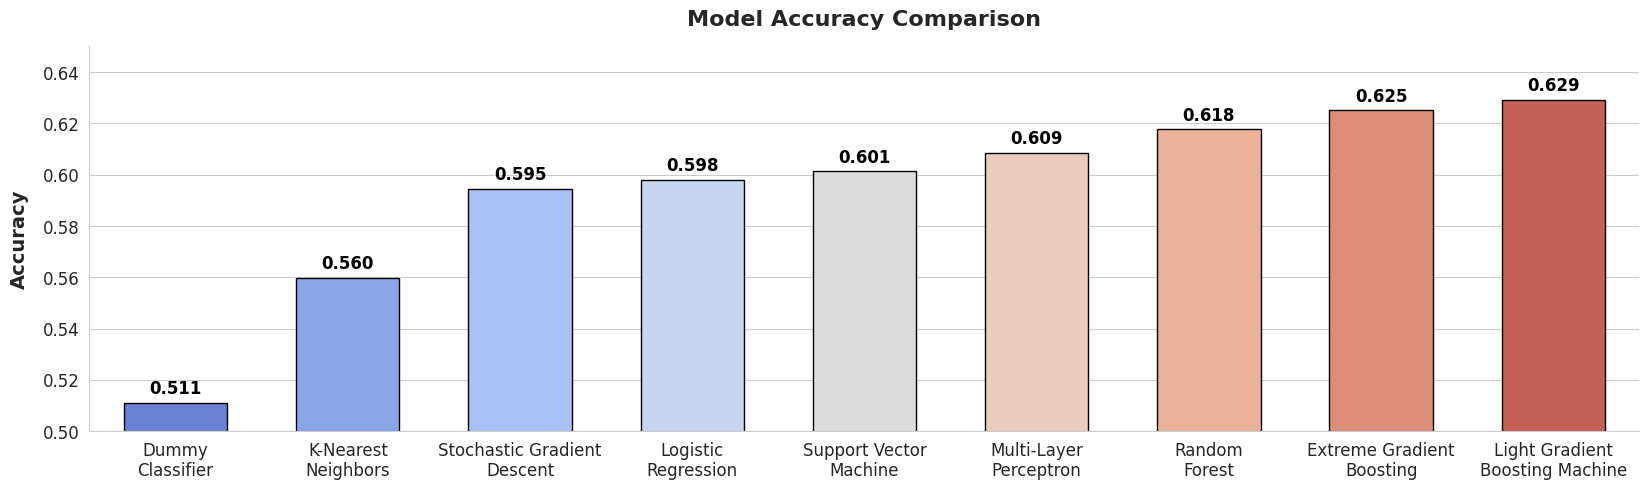

In [30]:
models = ["Dummy\nClassifier", "K-Nearest\nNeighbors", "Stochastic Gradient\nDescent",
          "Logistic\nRegression", "Support Vector\nMachine", "Multi-Layer\nPerceptron",
          "Random\nForest", "Extreme Gradient\nBoosting", "Light Gradient\nBoosting Machine"]

accuracies = [dummy_accuracy, knn_accuracy, sgd_accuracy, logistic_accuracy, svm_accuracy,
              mlp_accuracy, rfc_accuracy, xgb_accuracy, lgbm_accuracy]  


plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")
colors = sns.color_palette("coolwarm", len(models))  

# Barplot
ax = sns.barplot(x=np.array(models), y=np.array(accuracies), palette=colors, edgecolor="black", width=0.6)

# Label
for bar, accuracy in zip(ax.patches, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, f"{accuracy:.3f}", 
            ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.50, 0.65) 
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold", pad=15)
sns.despine()
plt.show()



## **Model Optimization**

<p class="mb-5">
Now here’s the thing — I’d been training and validating on 90% of the data. But since I was about to tune this model for submission...<br> <br>
Now I trained the model on <strong> 100% </strong> of the data. Yes, it’ll overfit on this set. But <em>who cares?</em> I’m not evaluating anymore — I’m optimizing for the final submission.
This stage is all about pushing the accuracy on the test set using the best-tuned parameters. Validation drama ends here.
</p>



In [31]:
X_train_transformed = column_transformer.transform(X_train_dropped)



### **Tuning LightGBM**  

<p class="mb-5">
I used RandomizedSearchCV to find the best combo of hyperparameters. Why Randomized and not GridSearch? Because I value my time, RAM, and sanity. I tuned three time and got accuracies of <strong>0.7261</strong>, <strong>0.7493</strong> and <strong>0.7284</strong> respectively. <br> <br>
<strong>Note:</strong> These are definitely overfitting slightly now since we’re using 100% of the data. But again, who cares? Now I just want to push accuracy on the private data, so obviously I’m using the full dataset.
</p>



In [ ]:
param_dist = {
    'num_leaves': np.arange(100, 300, 7),  
    'max_depth': np.arange(5, 15, 1),
    'learning_rate': np.linspace(0.01, 0.1, 100),
    'n_estimators': np.arange(100, 300),
    'min_child_samples': np.arange(5, 30),
    'min_child_weight': np.logspace(-2, 1, 100),
    'subsample': np.linspace(0.7, 1.0, 100),
    'colsample_bytree': np.linspace(0.7, 1.0, 100),
    'reg_alpha': np.logspace(-3, 0, 100),
    'reg_lambda': np.logspace(-3, 0, 100)
}

lgbm = LGBMClassifier(verbose=-1)

random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist, 
    n_iter=50,
    scoring='accuracy',
    cv=5, 
    verbose=1, 
    n_jobs=-1,
    random_state=69
)

random_search.fit(X_train_transformed, y_train_transformed)
best_lgbm = random_search.best_estimator_
best_lgbm

In [32]:
# 3 LGBM Models
lgbm1 = LGBMClassifier(num_leaves=146, max_depth=11, learning_rate=0.04059333955483345, n_estimators=215, min_child_samples=12, min_child_weight=5.348307316066151, subsample=0.8015824978715238, colsample_bytree=0.7528665653163558, reg_alpha=0.01794072813847298, reg_lambda=0.00446283946806131, verbose=-1)
lgbm2 = LGBMClassifier(num_leaves=241, max_depth=11, learning_rate=0.04267548857660626, n_estimators=176, min_child_samples=17, min_child_weight=0.34453075904087466, subsample=0.9420126904183629, colsample_bytree=0.8969001870626069, reg_alpha=0.2534079006185169, reg_lambda=0.22093082929171354, verbose=-1)
lgbm3 = LGBMClassifier(num_leaves=227, max_depth=10, learning_rate=0.02643396947526321, n_estimators=247, min_child_samples=16, min_child_weight=0.3399998175512427, subsample=0.9860913792672888, colsample_bytree=0.9193166643298747, reg_alpha=0.007954215605781124, reg_lambda=0.1780820734696766, verbose=-1)

lgbm1.fit(X_train_transformed, y_train)
lgbm2.fit(X_train_transformed, y_train)
lgbm3.fit(X_train_transformed, y_train)
lgbm1_accuracy = accuracy_score(y_val_transformed, lgbm1.predict(X_val_transformed))
lgbm2_accuracy = accuracy_score(y_val_transformed, lgbm2.predict(X_val_transformed))
lgbm3_accuracy = accuracy_score(y_val_transformed, lgbm3.predict(X_val_transformed))

print(f"Tuned LGBM1 Accuracy: {lgbm1_accuracy:.4f}")
print(f"Tuned LGBM2 Accuracy: {lgbm2_accuracy:.4f}")
print(f"Tuned LGBM3 Accuracy: {lgbm3_accuracy:.4f}")


Tuned LGBM1 Accuracy: 0.7261
Tuned LGBM2 Accuracy: 0.7493
Tuned LGBM3 Accuracy: 0.7284




### **Ensemble Learning with Voting Classifier**  

<p class="mb-5">
  Combined above three tuned LightGBM models using a <code>Voting Classifier</code> for better generalization. Achieved an accuracy of <strong>0.7359</strong>, slightly lower than the best individual LGBM model (<strong>0.7493</strong>). <br> <br>
  Despite the lower accuracy, ensembling improves robustness and is expected to perform better on unseen data. And boom — rightly so! I submitted this model to check accuracy on the private data, and it came out as <strong>0.6470</strong>. That’s how I landed at <strong>#1</strong> on the leaderboard.
</p>

![0.6470 Screenshot](https://raw.githubusercontent.com/Yadav-Aayansh/System-Threat-Forecaster/main/assets/0.6470_screenshot.png)



In [33]:
base_models = [('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3)]

voting_classifier = VotingClassifier(estimators=base_models, voting='hard')
voting_classifier.fit(X_train_transformed, y_train)
voting_classifier_accuracy = accuracy_score(y_val_transformed, voting_classifier.predict(X_val_transformed))

print(f"Voting Classifier Accuracy: {voting_classifier_accuracy:.4f}")

Voting Classifier Accuracy: 0.7359




### **Tuning 2.0: The Diabolical Tuning**  

<p class="mb-5">Why settle for less when you can tweak, tune, and keep trying? I kept adding more LGBMs, always chasing that elusive 0.75 accuracy. Sure, it's a rollercoaster with overfitting on the private data scores, but you know what? This is where the fun begins. After all, in India, we don’t stop at <em>Good Enough</em>.</p>

![Diabolical Laser](https://raw.githubusercontent.com/Yadav-Aayansh/System-Threat-Forecaster/main/assets/Diabolical.png)



In [34]:
# 5 More LGBM Models
lgbm4 = LGBMClassifier(num_leaves = 181, max_depth = 10, learning_rate = 0.04130232296795349, n_estimators = 228, min_child_samples = 29, min_child_weight = 1.8974552838538845, subsample = 0.7827368388408219, colsample_bytree = 0.7629249518899549, reg_alpha = 0.07533822749656874, reg_lambda = 0.0015430279436605976)
lgbm5 = LGBMClassifier(num_leaves=169, max_depth=10, learning_rate=0.05233350977069071, n_estimators=231, min_child_samples=22, min_child_weight=0.4601062504283119, subsample=0.9390809394397799, colsample_bytree=0.7764703821961773, reg_alpha=0.1598399044304671, reg_lambda=1.6612340944171649)
lgbm6 = LGBMClassifier(num_leaves=269, max_depth=11, learning_rate=0.035393108325162924, n_estimators=229, min_child_samples=23, min_child_weight=0.5340539301261625, subsample=0.9246962331578512, colsample_bytree=0.9088757439239776, reg_alpha=0.2602063481715106, reg_lambda=1.0107331287932972)
lgbm7 = LGBMClassifier(num_leaves=186, max_depth=11, learning_rate=0.04584370337618702, n_estimators=151, min_child_samples=25, min_child_weight=0.1159493172007911, subsample=0.5484014391486206, colsample_bytree=0.7508636391009044, reg_alpha=0.004148047682050917, reg_lambda=0.0072449781860701905)
lgbm8 = LGBMClassifier(num_leaves = 160, max_depth = 13, learning_rate = 0.041619634901885666, n_estimators = 252, min_child_samples = 39, min_child_weight = 0.01163215435201914, subsample = 0.9461943583274226, colsample_bytree = 0.7569519218012518, reg_alpha = 0.003349476296685088, reg_lambda = 0.1693179077289772)

# One XGB Model
xgb = XGBClassifier(n_estimators = 387, max_depth = 9, learning_rate = 0.026577196331014415, subsample = 0.985994351977102, colsample_bytree = 0.8102255771398449, gamma = 1.2078424008928528, reg_alpha = 0.18482880642623628, reg_lambda = 0.03203503173352191, scale_pos_weight = 1.004871302905267)

lgbm4.fit(X_train_transformed, y_train)
lgbm5.fit(X_train_transformed, y_train)
lgbm6.fit(X_train_transformed, y_train)
lgbm7.fit(X_train_transformed, y_train)
lgbm8.fit(X_train_transformed, y_train)
xgb.fit(X_train_transformed, y_train)
lgbm4_accuracy = accuracy_score(y_val_transformed, lgbm4.predict(X_val_transformed))
lgbm5_accuracy = accuracy_score(y_val_transformed, lgbm5.predict(X_val_transformed))
lgbm6_accuracy = accuracy_score(y_val_transformed, lgbm6.predict(X_val_transformed))
lgbm7_accuracy = accuracy_score(y_val_transformed, lgbm7.predict(X_val_transformed))
lgbm8_accuracy = accuracy_score(y_val_transformed, lgbm8.predict(X_val_transformed))
xgb_accuracy = accuracy_score(y_val_transformed, xgb.predict(X_val_transformed))


print(f"Tuned LGBM4 Accuracy: {lgbm4_accuracy:.4f}")
print(f"Tuned LGBM5 Accuracy: {lgbm5_accuracy:.4f}")
print(f"Tuned LGBM6 Accuracy: {lgbm6_accuracy:.4f}")
print(f"Tuned LGBM7 Accuracy: {lgbm7_accuracy:.4f}")
print(f"Tuned LGBM8 Accuracy: {lgbm8_accuracy:.4f}")
print(f"Tuned XGB Accuracy: {xgb_accuracy:.4f}")


Tuned LGBM4 Accuracy: 0.7322
Tuned LGBM5 Accuracy: 0.7429
Tuned LGBM6 Accuracy: 0.7546
Tuned LGBM7 Accuracy: 0.7264
Tuned LGBM8 Accuracy: 0.7520
Tuned XGB Accuracy: 0.7672





### **Multi Layer Diabolical Voting**  

<p class="mb-5">
Because one layer of chaos wasn’t enough. I stacked voting classifiers on top of other voting classifiers — hoping the ensemble madness captures patterns that single models miss. This is ensembling... But on <em>Steroids</em>.
</p>

<h4 class="font-semibold"> Voting Classifier : Layer 1 </h4>



In [35]:
base_models_2 = [('lgbm8', lgbm8), ('lgbm4', lgbm4), ('lgbm5', lgbm5), ('lgbm6', lgbm6), ('lgbm7', lgbm7), ('xgb', xgb)]

voting_classifier_2 = VotingClassifier(estimators=base_models_2, voting='hard')
voting_classifier_2.fit(X_train_transformed, y_train)
voting_classifier_accuracy_2 = accuracy_score(y_val_transformed, voting_classifier_2.predict(X_val_transformed))

print(f"Voting Classifier 2 Accuracy: {voting_classifier_accuracy_2:.4f}")


Voting Classifier 2 Accuracy: 0.7461


In [36]:
base_models_3 = [('lgbm8', lgbm8), ('lgbm4', lgbm4), ('lgbm5', lgbm5), ('lgbm2', lgbm2), ('lgbm3', lgbm3)]

voting_classifier_3 = VotingClassifier(estimators=base_models_3, voting='hard')
voting_classifier_3.fit(X_train_transformed, y_train)
voting_classifier_accuracy_3 = accuracy_score(y_val_transformed, voting_classifier_3.predict(X_val_transformed))

print(f"Voting Classifier 3 Accuracy: {voting_classifier_accuracy_3:.4f}")


Voting Classifier 3 Accuracy: 0.7426




<h4 class="font-semibold"> Voting Classifier : Layer 2 </h4>




In [37]:
base_models_4 = [('vc2', voting_classifier_2), ('vc3', voting_classifier_3)]

voting_classifier_4 = VotingClassifier(estimators=base_models_4, voting='hard')
voting_classifier_4.fit(X_train_transformed, y_train)
voting_classifier_accuracy_4 = accuracy_score(y_val_transformed, voting_classifier_4.predict(X_val_transformed))

print(f"Voting Classifier 4 Accuracy: {voting_classifier_accuracy_4:.4f}")


Voting Classifier 4 Accuracy: 0.7452



### **Final Submission**

<p class="mb-5"> Submitted this <strong>Monster</strong>, and boom — accuracy jumped to 0.6495 (Yes Yes, Let’s call it a respectable 0.65!). And guess what? Still dominating the leaderboard at #1.  </p>



In [ ]:
predictions = voting_classifier_4.predict(test_transformed)  

pred_df = pd.DataFrame({
    'id': range(10000),
    'target': predictions
})  

# Save the predictions DataFrame to a CSV file
pred_df.to_csv('submission.csv', index=False)



![0.6495 Screenshot](https://raw.githubusercontent.com/Yadav-Aayansh/System-Threat-Forecaster/main/assets/0.6495_screenshot.png)

![Effective Leaderboard](https://raw.githubusercontent.com/Yadav-Aayansh/System-Threat-Forecaster/main/assets/Effective_Leaderboard.png)

### **Model Evaluation**

<p class="mb-5">
Malware detection recall is 79%, meaning the model successfully identifies most infected systems but may misclassify some clean ones.
False negatives are lower than false positives, indicating the model prioritizes catching malware over mistakenly marking clean systems.
</p>




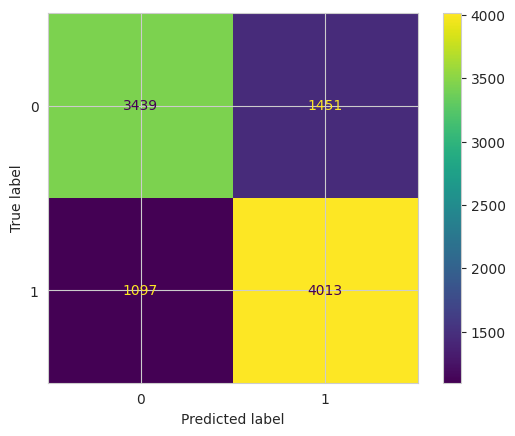

In [38]:
ConfusionMatrixDisplay.from_predictions(y_val_transformed,voting_classifier_4.predict(X_val_transformed))
plt.show()

In [39]:
print(classification_report(y_val_transformed,voting_classifier.predict(X_val_transformed)))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      4890
           1       0.72      0.79      0.75      5110

    accuracy                           0.74     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.74      0.73     10000





## **Conclusion**

<ol class="ms-5 mb-5">
    <li class="li-square">
        <strong>Signature Version</strong> is the most important feature, indicating that malware detection heavily relies on antivirus definitions.  
    </li>
    <li class="li-square">
        <strong>CityID</strong> matters, suggesting some cities are highly targeted, which aligns with real-world attack patterns.   
    </li>
    <li class="li-square">
        <strong>DiffOS</strong> indicates that users who install or update their system before updating antivirus definitions are more likely to be affected by malware, highlighting a key feature engineering direction.   
    </li>
    <li class="li-square">
        <strong>NumericOSVersion</strong>, <strong>AntivirusConfigID</strong> impact detection, as malware may exploit outdated or misconfigured OS versions.  
    </li>
</ol>



In [40]:
feature_importance = pd.DataFrame({
    'Feature': column_transformer.get_feature_names_out(),
    'Importance': lgbm1.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance[:10]

,Feature,Importance
37,ordinal__SignatureVersion,2277
6,most_frequent__CityID,2100
14,most_frequent__ProcessorModelID,1927
0,most_frequent__SystemVolumeCapacityMB,1897
17,most_frequent__FirmwareVersionID,1736
11,most_frequent__OEMModelID,1698
22,most_frequent__DiffOS,1439
3,most_frequent__AntivirusConfigID,1336
15,most_frequent__OSInstallLanguageID,1201
41,ordinal__NumericOSVersion,1188




<p class="mb-4">
    If you made it this far — you're a real one. Whether you're here for the ML, the memes, or just lurking for leaderboard secrets, I hope this ride was worth your time.
  </p>
  <p>
    This wasn't just about winning — it was about learning, experimenting, overfitting like a maniac, and still shipping something that worked.
  </p>

<div class="text-center mb-10">
  <h3 class="text-2xl font-bold mb-4">Thanks for Surviving This Madness</h3>
</div>
 
